In [ ]:
import requests
import pandas as pd
import json

url = "https://randomuser.me/api/?results=1000"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    users = data["results"]
    
    df = pd.json_normalize(users)
    # print(df.sample(5))
    print(json.dumps(data, indent=4))
    
    # df.to_csv("users_1000_records.csv", index=False)
    # print("CSV file saved successfully")
else:
    print("API request failed with status code:", response.status_code)

In [7]:
# data = response.json()
records = data["results"]
df = pd.json_normalize(records)
print(df.head())

   gender                             email           phone            cell  \
0  female     naja.christiansen@example.com        68887575        41797589   
1  female             lola.rose@example.com     01134 37759    07273 995836   
2  female        caterina.louis@example.com   077 485 63 19   078 650 83 96   
3  female  gabrielle.carpentier@example.com   076 632 11 91   078 542 26 42   
4    male          darrell.soto@example.com  (944) 848-9258  (394) 629-2666   

  nat name.title name.first     name.last  location.street.number  \
0  DK        Mrs       Naja  Christiansen                    8261   
1  GB         Ms       Lola          Rose                    3952   
2  CH     Madame   Caterina         Louis                    2259   
3  CH     Madame  Gabrielle    Carpentier                    1535   
4  US         Mr    Darrell          Soto                    3153   

  location.street.name  ...  \
0           Skelbækvej  ...   
1          West Street  ...   
2    Place de L'É

In [8]:
temp_df = pd.DataFrame(response.json()['results'])[['gender','email','phone','cell','nat']]
temp_df.head()

,gender,email,phone,cell,nat
0,female,naja.christiansen@example.com,68887575,41797589,DK
1,female,lola.rose@example.com,01134 37759,07273 995836,GB
2,female,caterina.louis@example.com,077 485 63 19,078 650 83 96,CH
3,female,gabrielle.carpentier@example.com,076 632 11 91,078 542 26 42,CH
4,male,darrell.soto@example.com,(944) 848-9258,(394) 629-2666,US


In [19]:
print(df.head())

   gender                             email         phone           cell nat  \
0    male      marius.jorgensen@example.com      83780692       26487108  DK   
1    male         gabriel.singh@example.com  F02 J26-5834   F28 F43-7315  CA   
2    male          leevi.savela@example.com    02-686-912  047-531-91-43  FI   
3  female  vojislava.kuzmanovic@example.com  018-2636-416   067-0503-670  RS   
4    male             adam.brar@example.com  L08 K78-2975   B22 W69-4881  CA   

  name.title name.first   name.last  location.street.number  \
0         Mr     Marius   Jørgensen                    5552   
1         Mr    Gabriel       Singh                    5486   
2         Mr      Leevi      Savela                    8146   
3       Miss  Vojislava  Kuzmanović                    4306   
4         Mr       Adam        Brar                    8791   

  location.street.name  ...  \
0             Dalbyvej  ...   
1             Elgin St  ...   
2             Rotuaari  ...   
3     Ljubiše Gl

In [20]:
print(df.describe())

       location.street.number      dob.age  registered.age
count              1000.00000  1000.000000     1000.000000
mean               5050.75900    52.003000       12.996000
std                2922.81732    16.575577        5.820469
min                  10.00000    24.000000        3.000000
25%                2435.75000    37.000000        8.000000
50%                5067.50000    52.000000       13.000000
75%                7765.25000    66.000000       18.000000
max                9990.00000    81.000000       23.000000


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   gender                          1000 non-null   object
 1   email                           1000 non-null   object
 2   phone                           1000 non-null   object
 3   cell                            1000 non-null   object
 4   nat                             1000 non-null   object
 5   name.title                      1000 non-null   object
 6   name.first                      1000 non-null   object
 7   name.last                       1000 non-null   object
 8   location.street.number          1000 non-null   int64 
 9   location.street.name            1000 non-null   object
 10  location.city                   1000 non-null   object
 11  location.state                  1000 non-null   object
 12  location.country                1000 non-null   o

In [26]:
df.isnull().sum()

gender                              0
email                               0
phone                               0
cell                                0
nat                                 0
name.title                          0
name.first                          0
name.last                           0
location.street.number              0
location.street.name                0
location.city                       0
location.state                      0
location.country                    0
location.postcode                   0
location.coordinates.latitude       0
location.coordinates.longitude      0
location.timezone.offset            0
location.timezone.description       0
login.uuid                          0
login.username                      0
login.password                      0
login.salt                          0
login.md5                           0
login.sha1                          0
login.sha256                        0
dob.date                            0
dob.age     

In [34]:
print(f'number of duplicate rows: {df.duplicated().sum()}')

number of duplicate rows: 0


In [38]:
df = df.dropna()
df

,gender,email,phone,cell,nat,name.title,name.first,name.last,location.street.number,location.street.name,...,login.sha256,dob.date,dob.age,registered.date,registered.age,id.name,id.value,picture.large,picture.medium,picture.thumbnail
0,female,stefanija.jevremovic@example.com,019-4633-419,063-9591-185,RS,Miss,Stefanija,Jevremović,3815,Radnih Akcija,...,89958285b2ba0c780bbbac5d152b422290f1ebb25bc65b...,1980-08-07T22:12:05.120Z,45,2013-10-17T20:20:11.780Z,12,SID,247036777,https://randomuser.me/api/portraits/women/36.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
1,female,vanea.aragao@example.com,(78) 7105-2858,(09) 8412-7179,BR,Mrs,Vânea,Aragão,4795,Rua São Francisco,...,9d7c6d5487f075793a82505ae26b1c4668889f1f11531a...,1948-07-09T23:08:18.679Z,77,2010-01-23T12:24:08.083Z,16,CPF,019.191.498-28,https://randomuser.me/api/portraits/women/49.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
2,female,abbie.price@example.com,016977 7705,07184 681206,GB,Miss,Abbie,Price,8885,West Street,...,30dd1f39aa5d390bc353916b5a0eedb1d7d01a07bd8139...,1999-09-05T09:34:43.787Z,26,2015-01-12T08:24:58.970Z,11,NINO,WL 23 04 78 M,https://randomuser.me/api/portraits/women/58.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
3,female,bhoomika.saldanha@example.com,9656237855,9985599633,IN,Mrs,Bhoomika,Saldanha,599,Sampige Rd,...,96817c25398ad8a28c858a774bc8f70e72a94e916107c6...,1957-10-09T19:05:15.348Z,68,2019-12-03T12:51:01.714Z,6,UIDAI,421482583233,https://randomuser.me/api/portraits/women/20.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
4,male,owen.walters@example.com,(489) 265-8537,(328) 358-7710,US,Mr,Owen,Walters,9016,Oak Lawn Ave,...,0f0d66d12cff08dc807c92dbda10c20a5dbabaec0e0f96...,1964-06-23T21:56:09.081Z,61,2006-01-01T13:29:56.187Z,20,SSN,103-21-5258,https://randomuser.me/api/portraits/men/5.jpg,https://randomuser.me/api/portraits/med/men/5.jpg,https://randomuser.me/api/portraits/thumb/men/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,female,matilde.colin@example.com,078 154 17 10,076 406 45 09,CH,Madame,Matilde,Colin,5421,Avenue du Fort-Caire,...,58766cfa04948faa1ff76394c22a805690f11a9981ec9a...,1976-01-13T22:10:22.262Z,50,2019-05-13T14:28:38.408Z,6,AVS,756.1302.8380.28,https://randomuser.me/api/portraits/women/35.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
995,female,tamara.desouza@example.com,(47) 2268-7206,(09) 9959-8921,BR,Ms,Tamara,de Souza,8963,Rua Bela Vista,...,0a8e517090a59c688bc15bd3b3fb0a390c215c289c090c...,1960-11-06T22:27:14.661Z,65,2017-02-13T13:30:02.646Z,8,CPF,447.915.605-46,https://randomuser.me/api/portraits/women/83.jpg,https://randomuser.me/api/portraits/med/women/...,https://randomuser.me/api/portraits/thumb/wome...
996,male,milutin.blagojevic@example.com,028-5103-028,069-4674-146,RS,Mr,Milutin,Blagojević,1950,Makarija Sokolovića,...,feb778c9b989c5109a18e4aaf91fe716e5178d0cd41f7b...,1975-07-02T16:16:45.144Z,50,2003-12-19T06:08:13.913Z,22,SID,157142689,https://randomuser.me/api/portraits/men/23.jpg,https://randomuser.me/api/portraits/med/men/23...,https://randomuser.me/api/portraits/thumb/men/...
998,male,curtis.mills@example.com,041-433-1263,081-109-2996,IE,Mr,Curtis,Mills,1393,New Street,...,5a8f2375ac849225a1e4ba22391ce8358d3ab16336230b...,1965-12-27T20:32:07.453Z,60,2011-09-20T17:01:06.179Z,14,PPS,7259831T,https://randomuser.me/api/portraits/men/52.jpg,https://randomuser.me/api/portraits/med/men/52...,https://randomuser.me/api/portraits/thumb/men/...


In [9]:
df['dob.age'] = df['dob.age'].fillna(df['dob.age'].median())
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [10]:
df['dob.age'] = df['dob.age'].astype(int)
df['dob.date'] = pd.to_datetime(df['dob.date'])

In [11]:
df = df.drop(columns=[
    'picture.large',
    'picture.medium',
    'picture.thumbnail',
    'login.uuid',
    'login.password',
    'login.salt'
])

Univariate analysis

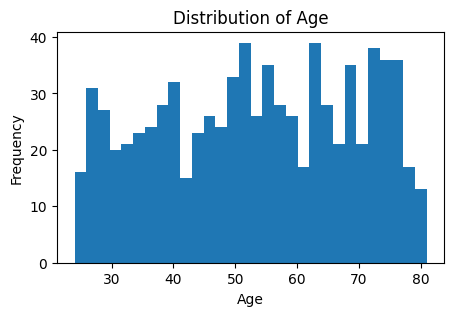

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.hist(df['dob.age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

The age distribution plot shows that users are spread across a wide range of ages, with a higher concentration in the adult age group. The distribution appears approximately normal,indicating no extreme age related outliers.

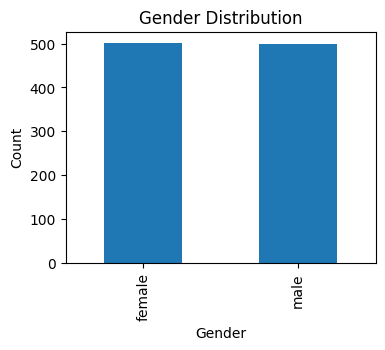

In [6]:
import matplotlib.pyplot as plt
gender_counts = df["gender"].value_counts()

plt.figure(figsize=(4,3))
gender_counts.plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

The counts for each gender appears to be  balanced, indicating no strong gender bias in the data. This balanced distribution helps ensure fair analysis and reduces the risk of skewed results.

In [5]:
df.columns

Index(['gender', 'email', 'phone', 'cell', 'nat', 'name.title', 'name.first',
       'name.last', 'location.street.number', 'location.street.name',
       'location.city', 'location.state', 'location.country',
       'location.postcode', 'location.coordinates.latitude',
       'location.coordinates.longitude', 'location.timezone.offset',
       'location.timezone.description', 'login.username', 'login.md5',
       'login.sha1', 'login.sha256', 'dob.date', 'dob.age', 'registered.date',
       'registered.age', 'id.name', 'id.value'],
      dtype='object')

Multivariate analysis

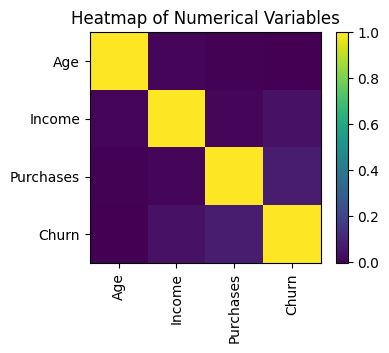

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
df = pd.DataFrame({
    "Age": np.random.randint(18, 65, 1000),
    "Income": np.random.normal(50000, 15000, 1000).astype(int),
    "Purchases": np.random.poisson(10, 1000),
    "Churn": np.random.choice([0, 1], 1000)
})

df = df.astype('int64')
num_df = df.select_dtypes(include=["int64", "float64"])
corr = num_df.corr()

plt.figure(figsize=(4, 3))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Heatmap of Numerical Variables")
plt.show()

# pd.plotting.scatter_matrix(num_df, figsize=(8, 4))
# plt.suptitle("Pair Plot of Numerical Features")
# plt.show()

The correlation heatmap shows the relationships between Age, Income, Purchases and Churn. The diagonal values are 1, indicating perfect correlation.Overall, the variables exhibit weak correlations with each other. Age has minimal relationship with the other features, while Income shows a slight positive correlation with Purchases. The relationship between Purchases and Churn is also weak.

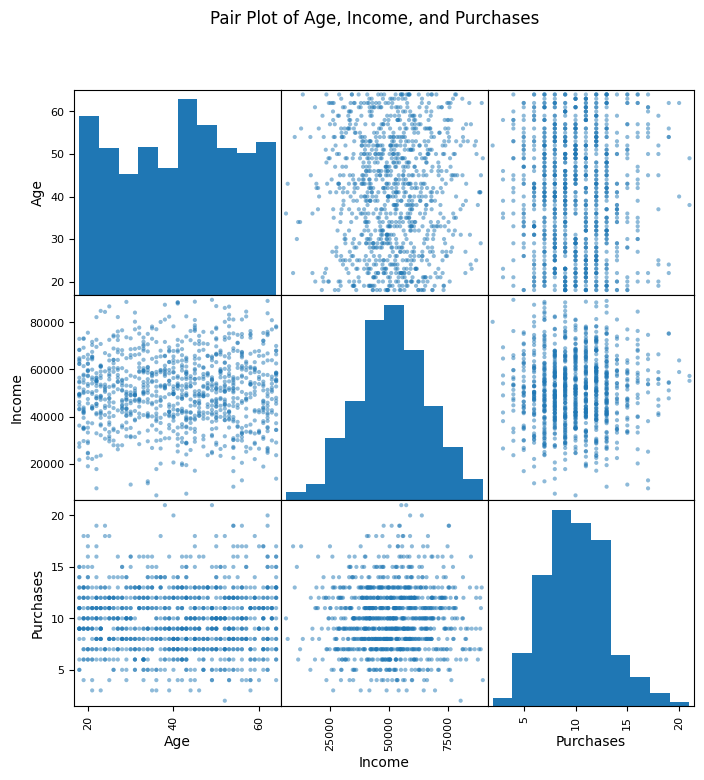

In [29]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

pair_df = df[["Age", "Income", "Purchases"]]
scatter_matrix(
    pair_df,
    figsize=(8, 8),
    diagonal="hist"
)

plt.suptitle("Pair Plot of Age, Income, and Purchases")
plt.show()

The pair plot visualizes pairwise relationships between numerical variables using scatter plots, while the diagonal shows the distribution of each variable. It helps identify trends, correlations, clusters, and outliers.
From the plot, we can observe how features like Age, Income, Purchases, and Churn interact with each other, making it useful for understanding data patterns before building predictive models.

Bivariate analysis

<Figure size 400x300 with 0 Axes>

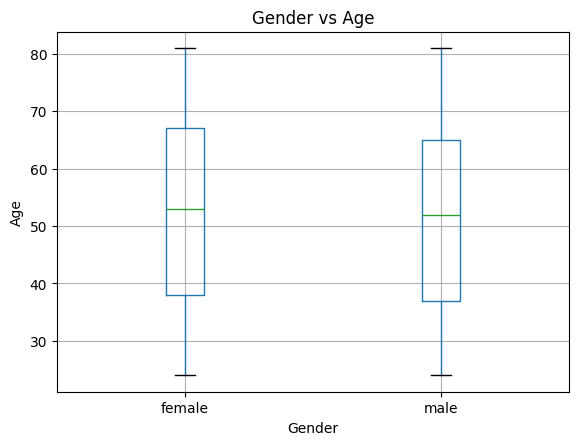

In [15]:
plt.figure(figsize=(4,3))
df.boxplot(column="dob.age", by="gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Gender vs Age")
plt.suptitle("")
plt.show()

The box plot compares the age distribution across different genders. The median ages and iqr appear similar indicating that age is evenly distributed among genders. There are no differences, suggesting that gender does not influence the age of users.

<Figure size 640x480 with 0 Axes>

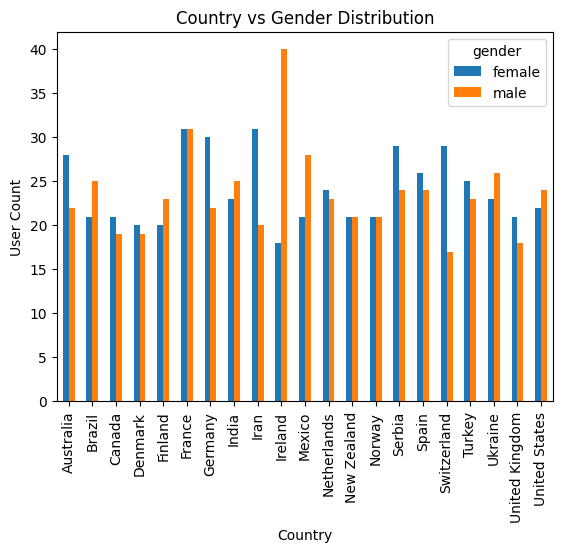

In [ ]:
country_gender_counts = pd.crosstab(df["location.country"], df["gender"])
plt.figure()
country_gender_counts.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("User Count")
plt.title("Country vs Gender Distribution")
plt.show()

The grouped bar plot shows the distribution of genders across different countries. While the overall gender proportions remain similar, slight variations are observed across countries, reflecting regional differences in user demographics. ireland has highest male ratio and switzerland has lowest male ratio. france has equal male and female.

In [2]:
from ydata_profiling import ProfileReport

profile = ProfileReport(
    df,
    title="EDA Profiling Report",
    explorative=True
)

profile.to_file("eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 34/34 [00:02<00:00, 12.99it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]